In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [2]:
def clean_dataframe() -> pd.DataFrame:
    # Read in Data
    df = pd.read_excel("../data/raw/ABSCHRIFTEN_20_Tagesbasis.xlsx")

    # Replace NaNs with 0
    df = df.replace({np.nan: 0})
    # Drop first column and other irrelevant rows
    df = df.drop(index=[0,1])
    # Drop aggregations
    df = df.drop(df.columns[2:4], axis=1)
    column_names = list(df.iloc[0, :])
    df.columns = column_names

    # Get GTIN as ID, remove first two entries
    GTIN = df.iloc[1, :]
    GTIN = GTIN[2:]
    GTIN = list(GTIN)
    GTIN.insert(0, "")

    # Keep only 'BACKWAREN BED' samples and drop the column then
    df = df[df.iloc[:,0] == "BACKWAREN BED"]
    df = df.iloc[:, 1:]
    # Rename time column
    df.rename(columns={df.columns[0]: "date" }, inplace = True)
    # Remove 'Ergebnis' row
    df = df[df["date"] != "Ergebnis"]

    # Reset index
    df = df.reset_index(drop=True)

    # Add GTIN to Names
    df.columns = [col + f"{gtin}" for col, gtin in zip(df.columns, GTIN)]

    # Put features in right data type
    df["date"] = pd.to_datetime(df["date"], dayfirst="True")

    numerical_columns = [col for col in df.columns if col != "date" ]
    df[numerical_columns] = df[numerical_columns].astype(np.float32)

    return df

df = clean_dataframe()
# Get only numerical cols
numerical_cols = df.select_dtypes(include='number').columns
# Preview df
df.head(3)

,date,MBK QUARK-BUSSY 1 STUECK25006940,MBK VESPERBROTGEMUESEVARIATION25009743,MBK VESPERBR. GEMUESEVAR. HALB25010633,BAK MINI-SCHNECKEN NUSS25012071,BAK MINI-SCHNECKEN QUARK25012088,BAK MINI-SCHNECKEN MOHN25012095,MBK SALAT 250G25014440,MBK SALAT GEMISCHT 227G25013832,MBK TOMATEN GANZ 1KG25016819,...,BAK D.-LAUGENST.M.FRISCHK.140G4314131012389,BAK GEWUERZTALER VOLLM.75G4314131015960,BAK GEWUERZTALER ZARTB. 110G4314131015977,BAK OMAS APFELSCHNITTE 165G4314131016240,BAK APFELPLUNDER 160G4314131016219,BAK KULTI 62G4314131000683,BAK KAESEBROET.M.LEBERWU.200G4314131011641,BAK DINKELBROETCHEN HABA 75G4314131010781,BAK KUERBISKERNBROET.HABA 75G4314131010798,BAK ROGGENMISCHBROET.HABA 65G4314131010880
0,2020-08-28,0.0,-21.620001,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-29,0.0,0.000000,-1.96,0.0,0.0,0.0,0.0,-17.639999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-31,0.0,0.000000,-1.96,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,date,MBK QUARK-BUSSY 1 STUECK25006940,MBK VESPERBROTGEMUESEVARIATION25009743,MBK VESPERBR. GEMUESEVAR. HALB25010633,BAK MINI-SCHNECKEN NUSS25012071,BAK MINI-SCHNECKEN QUARK25012088,BAK MINI-SCHNECKEN MOHN25012095,MBK SALAT 250G25014440,MBK SALAT GEMISCHT 227G25013832,MBK TOMATEN GANZ 1KG25016819,...,BAK D.-LAUGENST.M.FRISCHK.140G4314131012389,BAK GEWUERZTALER VOLLM.75G4314131015960,BAK GEWUERZTALER ZARTB. 110G4314131015977,BAK OMAS APFELSCHNITTE 165G4314131016240,BAK APFELPLUNDER 160G4314131016219,BAK KULTI 62G4314131000683,BAK KAESEBROET.M.LEBERWU.200G4314131011641,BAK DINKELBROETCHEN HABA 75G4314131010781,BAK KUERBISKERNBROET.HABA 75G4314131010798,BAK ROGGENMISCHBROET.HABA 65G4314131010880
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.0000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2020-10-31 11:45:36,-0.654900,-0.334100,-0.646800,-0.492800,-0.413600,-0.299200,-0.0299,-0.220500,-0.0177,...,-0.975000,-0.431200,-0.333200,-0.613600,-0.540000,-0.921200,-1.715000,-1.095600,-0.572700,-0.133200
min,2020-08-28 00:00:00,-14.750000,-21.620001,-19.600000,-15.840000,-30.799999,-8.800000,-2.9900,-17.639999,-1.7700,...,-22.500000,-15.680000,-17.639999,-11.800000,-15.120000,-18.129999,-20.580000,-14.110000,-6.640000,-8.140000
25%,2020-10-01 18:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122500,0.000000,0.000000,0.000000,0.000000
50%,2020-11-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-11-30 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-12-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,NaN,2.259365,2.321369,2.476955,2.432819,3.130581,1.377105,0.2990,1.813963,0.1770,...,2.862484,2.132201,1.910981,2.137861,2.113128,2.404820,4.319429,2.549049,1.472017,0.900986


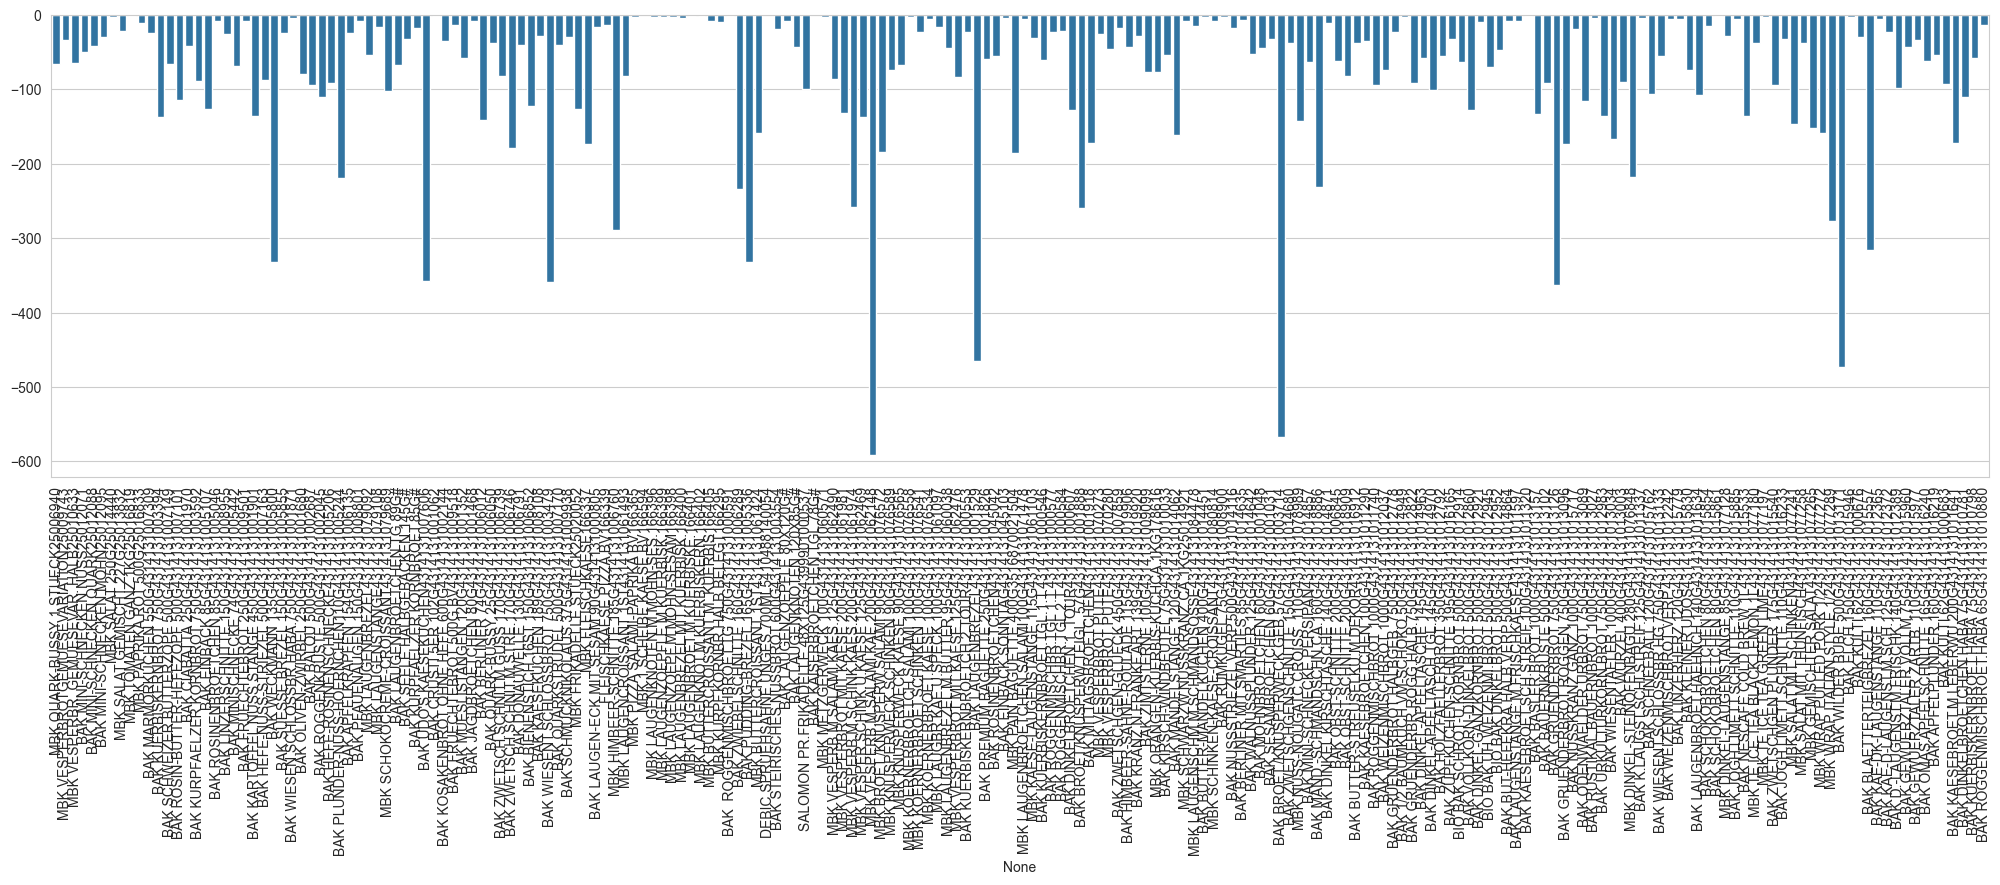

In [4]:
sums_aggregated = df[numerical_cols].sum()
plt.figure(figsize=(25, 6))
sns.barplot(x=sums_aggregated.keys(), y=sums_aggregated.values)
plt.xticks(rotation=90)
plt.show()

In [10]:
# Get products that are most thrown away
sums_aggregated.sort_values(ascending=True)

MBK VESPERB.M.SALAMI KAE.200G4314131062148    -591.489990
BAK BROET./KNUSPERWECK GEB.57G4314131003714   -567.599976
BAK WILDER BUBE 500G4314131013171             -473.350006
BAK LAUGENBREZEL4314131001529                 -465.459991
BAK GRUENDERBROT 750G4314131013126            -362.390015
                                                  ...    
MBK LAUGENKNOT.M.KUERBISKERN.166402             -1.030000
MBK LAUGENBROET.M.KUERBISKE.166401              -0.980000
MBK 1 SCHEIBE KAESE BV166594                    -0.490000
BAK KAISERBROETCHEN TGL.78G#                    -0.440000
DEBIC SPRUEHSAHNE UNGES.700ML5410488140054       0.000000
Length: 204, dtype: float32

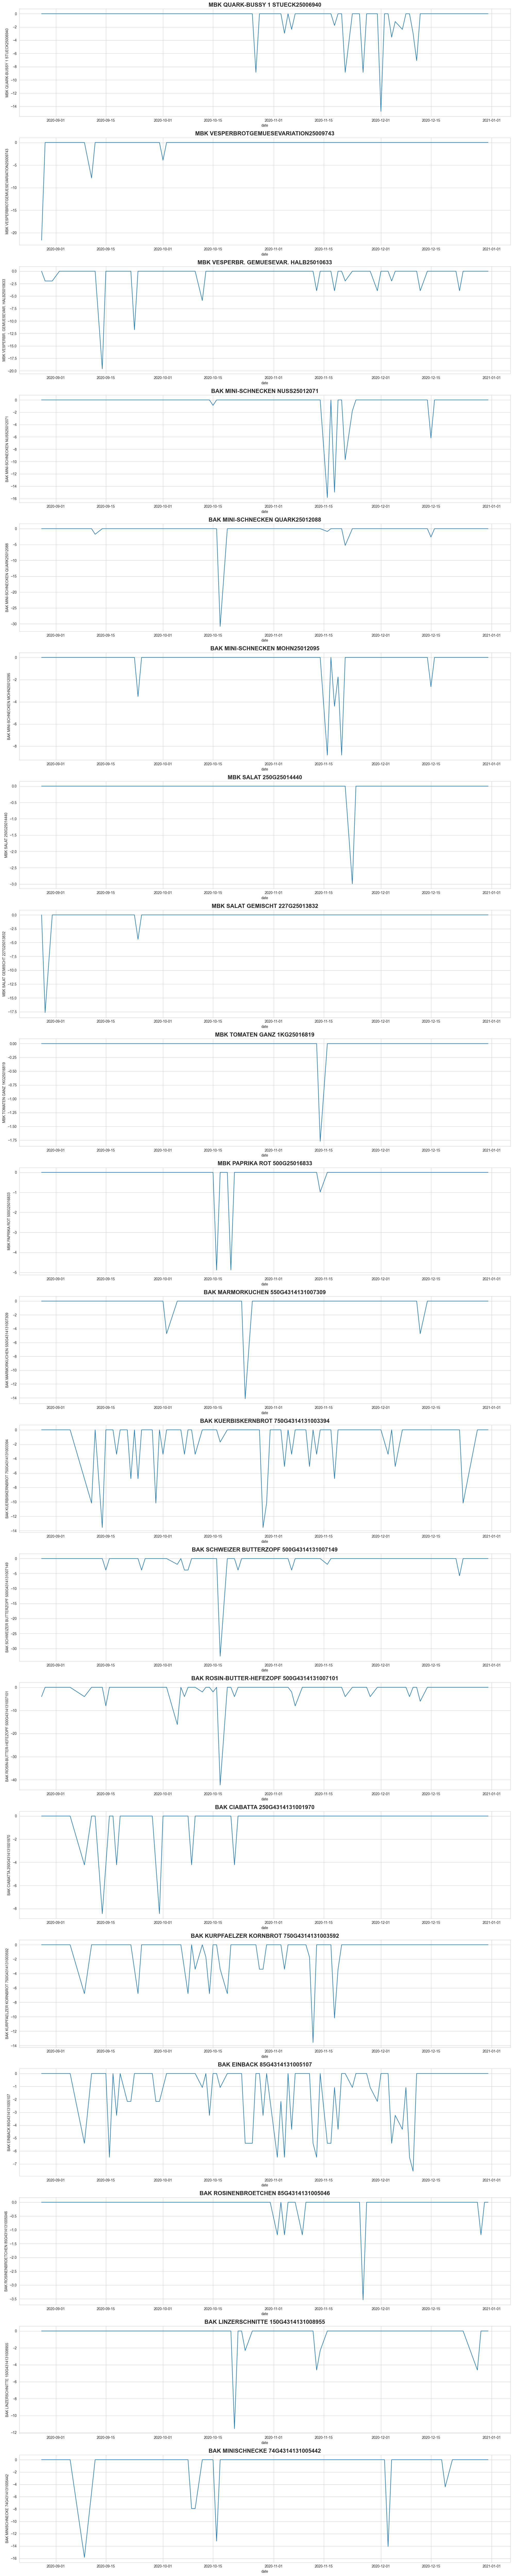

In [11]:
NROWS = 20
NCOLS = 1

fig, axes = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(20, NROWS*5))
for ax, col in zip(axes.flatten(), numerical_cols[:NROWS]):
    ax.set_title(col, fontweight="bold", size=16)
    sns.lineplot(data=df, x="date", y=col, ax=ax)
fig.tight_layout()
plt.show()